<a href="https://colab.research.google.com/github/Azhar-ali7/Netflix-Movies-TVshow-unsupervised/blob/main/Final_Netflix_Movies_and_tv_shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unsupervised ML: Netflix Movies and TV Shows Clustering

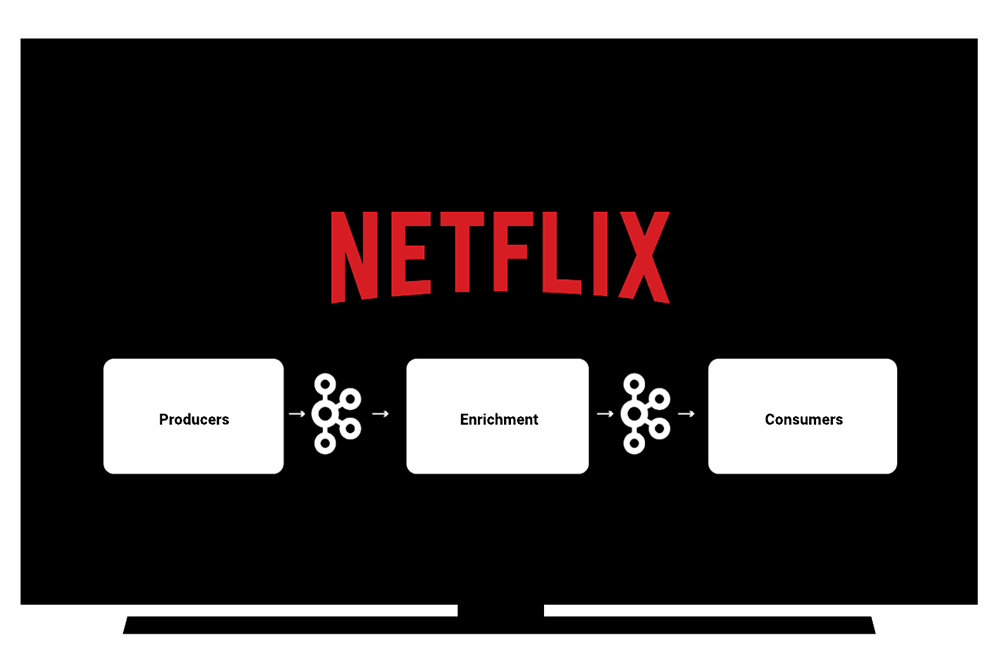

**Project Type:** Clustering

**Contribution:** Individual

**Team Member 1** - Azhar Ali

##Project Summary

**Data Preprocessing**


*   Importing the Libraries and Dataset
*   Data overview
*   Check and handling for null values
*   Text Preprocessing
*   Encoding
*   Feature Engineering


**Exploratory Data Analysis (EDA)**

1.   Type of Content : TV Shows and Movies
2.   Movies / TV shows added per year on Netflix
3.   Movies / TV shows added per month on Netflix
4.   Top 15 countries with most content
5.   Top Genres Movies/Tv Shows
6.   Movies/Tv shows Ratings
7.   Top Actors in Movies/Tv shows
8.   Top Directors in Movies/Tv shows
9.   Duration of Movies/Tv shows

**UnSupervised ML algorithms**

1.   Silhouette score
2.   Elbow Method
3.   Dendogram
4.   PCA



##Github
https://github.com/Azhar-ali7/Netflix-Movies-TVshow-unsupervised


##Problem Description

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.


####In this project, you are required to do 

*   Exploratory Data Analysis
*   Understanding what type content is available in different countries
*   Is Netflix has increasingly focusing on TV rather than movies in recent years.
*   Clustering similar content by matching text-based features







####Dataset Description



1.   show_id : Unique ID for every Movie / Tv Show

2.   type : Identifier - A Movie or TV Show

3.   title : Title of the Movie / Tv Show

4.   director : Director of the Movie

5.   cast : Actors involved in the movie / show

6.   country : Country where the movie / show was produced

7.   date_added : Date it was added on Netflix

8.   release_year : Actual Releaseyear of the movie / show

9.   rating : TV Rating of the movie / show

10.  duration : Total Duration - in minutes or number of seasons

11.  listed_in : Genere

12.  description: The Summary description

##Importing Libraries

In [123]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [124]:
# Loading a url
url = 'https://raw.githubusercontent.com/Azhar-ali7/Netflix-Movies-TVshow-unsupervised/main/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv'

# Reading csv file
netflix_df = pd.read_csv(url, encoding = 'latin-1')

##Understanding the data

Let's look at the top five rows and columns of the dataset.

In [125]:
# Top five rows
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Now, lets have a look at the last five rows of the dataset

In [126]:
# Last five rows
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [127]:
# Shape of dataset
netflix_df.shape

(7787, 12)

In [128]:
# No. of rows in Dataset are
print('No. of rows in Dataset are', netflix_df.shape[0])

# No. of columns in Dataset are
print('No. of columns in Dataset are', netflix_df.shape[1])

No. of rows in Dataset are 7787
No. of columns in Dataset are 12


Data type of each column in the dataset

In [129]:
# Data type
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [130]:
# Checking for unique values in each columm of the dataset
for i in netflix_df.columns:
  print('Total no of unique values in', i, 'are -->', len(netflix_df[i].unique()), '\n')

Total no of unique values in show_id are --> 7787 

Total no of unique values in type are --> 2 

Total no of unique values in title are --> 7787 

Total no of unique values in director are --> 4050 

Total no of unique values in cast are --> 6832 

Total no of unique values in country are --> 682 

Total no of unique values in date_added are --> 1566 

Total no of unique values in release_year are --> 73 

Total no of unique values in rating are --> 15 

Total no of unique values in duration are --> 216 

Total no of unique values in listed_in are --> 492 

Total no of unique values in description are --> 7769 



In [131]:
# Name of columns in the dataset
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [132]:
# Description of the dataset
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [133]:
# Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [134]:
# Total missing values in each column
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Plotting heatmap of different columns to check the missing values visually


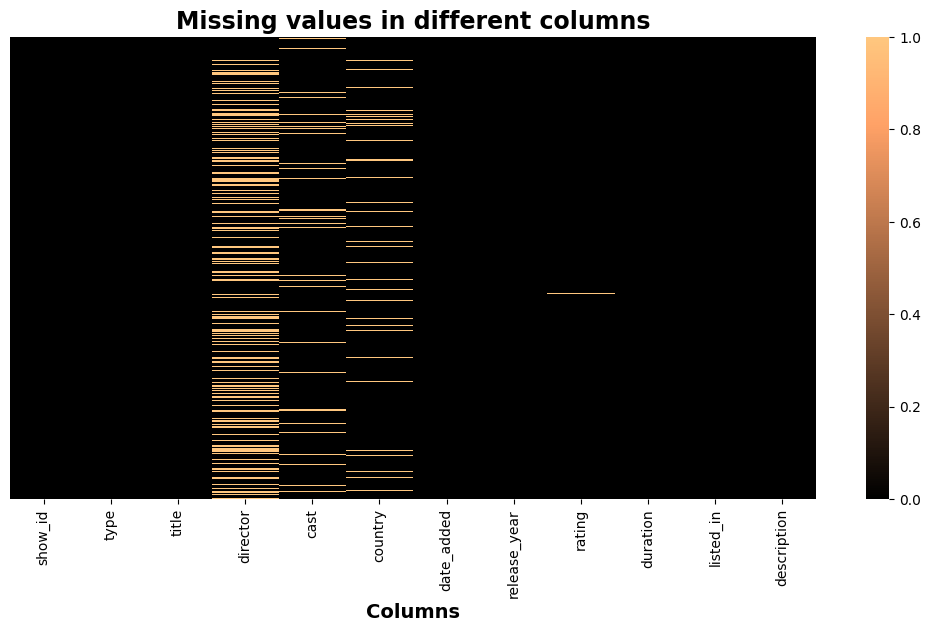

In [135]:
# Plot
# Setting figure size
plt.figure(figsize = (13,6))

# Heatmap
sns.heatmap(netflix_df.isnull(), cbar = True, yticklabels = False, cmap = 'copper')

# Settign x-label, title and fonts
plt.xlabel('Columns', size=14, fontweight="bold")
plt.title('Missing values in different columns', fontweight = "bold", size = 17)
plt.show()

In [136]:
# Null values in terms of percentage
netflix_df.isna().sum()/netflix_df.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

We have null values in the columns 'director', 'cast', 'country', 'date_added' and 'rating'. We cannot simply drop these null values because it will result in a loss of information. Also, we cannot replace these values with appropriate measures of central tendency after looking at their distribution. A fine approach would be if we replace these values with 'Not available except for two columns, the first one is 'date_added' and 'rating' as they both have less than one percent colour missing values. So, we will drop null values in these two columns.

In [137]:
# Dropping null values 
netflix_df.dropna(subset = ['date_added', 'rating'], inplace = True)

In [139]:
# Replacing null values 
netflix_df.fillna('Not available', inplace = True)

In [138]:
# Checking for duplicates in the dataset
netflix_df.duplicated().sum()

0

In [140]:
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

We will change the datatype of 'date_added' column and we wil add three more columns 'day_added', 'month_added' and 'year_added'.

In [141]:
# Changing the 'date_added' column data type from object to datetime datatype
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

# Extracting day from the 'date_added' column and creating a new column in the dataset
netflix_df['day_added'] = netflix_df['date_added'].dt.day 

# Extracting month from the 'date_added' column and creating a new column in the dataset
netflix_df['month_added'] = netflix_df['date_added'].dt.month_name()

# Extracting year from the 'date_added' column and creating a new column in the dataset
netflix_df['year_added'] = netflix_df['date_added'].dt.year

In [142]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,19,October,2020
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,March,2019
7784,s7785,Movie,Zulu Man in Japan,Not available,Nasty C,Not available,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",25,September,2020
7785,s7786,TV Show,Zumbo's Just Desserts,Not available,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,31,October,2020
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Not available,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,1,March,2020


In [143]:
netflix_df.rename(columns = {'listed_in': 'genres'}, inplace = True)

We will create the subsets of only movies and only TV shows using the column 'type' in the dataset

In [144]:
# Creating subsets for tv shows and movies.
only_tv_shows = netflix_df[netflix_df['type'] == 'TV Show']

only_movies = netflix_df[netflix_df['type'] == 'Movie']

##EDA

###Type of Content : TV Shows and Movies



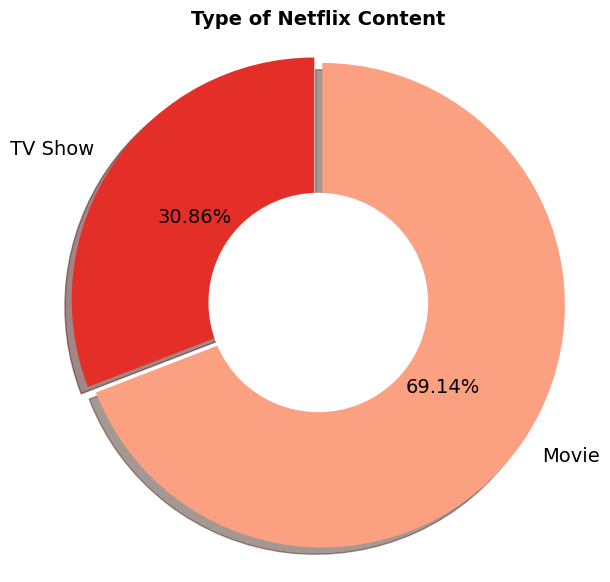

In [145]:
# Create a piechart
plt.figure(figsize=(7, 7))

# setting colour scheme
clr = sns.color_palette('Reds_r',2)

# labels
labels=['TV Show', 'Movie']

# pie plot
plt.pie(netflix_df['type'].value_counts().sort_values(), labels=labels, explode=[0.02,0.02],
        autopct='%1.2f%%', colors = clr, textprops={'fontsize': 14}, startangle=90, shadow = True)

# to make pie plot ine=to donut plot
circle = plt.Circle( (0,0), 0.45, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

# Setting title
plt.title('Type of Netflix Content', fontweight = 'bold', fontsize = 14)
plt.axis('equal')
plt.show()



Clearly number of Movies on Netflix outnumbered the number of TV Shows. Almost 70% content are movies while rest 30% are TV Shows.

### Movies / TV shows added per year on Netflix

Now storing the value counts of the movies and tv shows in different variables according to year they were added in Netflix database

In [146]:
# Movie counts by year
mov_count = only_movies.year_added.value_counts()

# TV show count by year
show_count = only_tv_shows.year_added.value_counts()

Text(0.5, 1.0, 'Movies/TV Shows Released per Year')

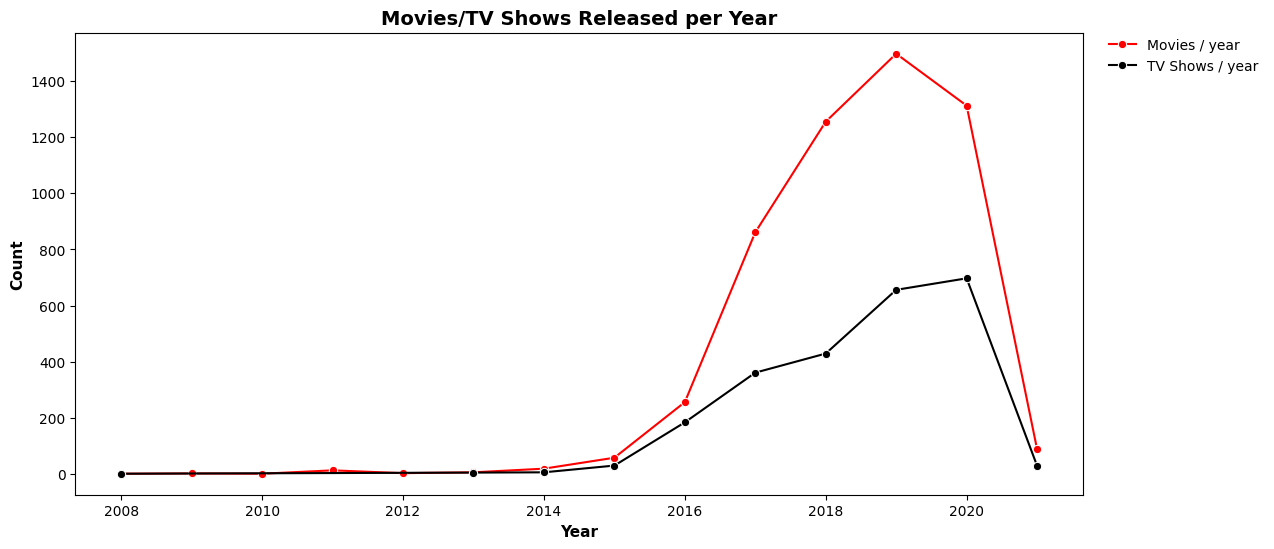

In [147]:
# figure size
plt.figure(figsize=(13,6))

# line plot 
sns.lineplot(data = mov_count, color="red",  label = "Movies / year", marker='o')
sns.lineplot(data = show_count, color="black",  label = "TV Shows / year", marker='o')

# grid style
plt.grid(color='white', linewidth=0.6)

# legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',
             borderaxespad=0,frameon=False)

# x, y labels anf title
plt.xlabel('Year', fontweight = 'bold', fontsize = 11)
plt.ylabel('Count', fontweight = 'bold', fontsize = 11)
plt.title('Movies/TV Shows Released per Year', fontweight = 'bold', fontsize = 14)

After 2014 the content on Netflix increased rapidly, and clearly Movies are greater in numbers than Tv shows. The downfall after 2020 is due to covid lockdown.

### Movies / TV shows added per month on Netflix

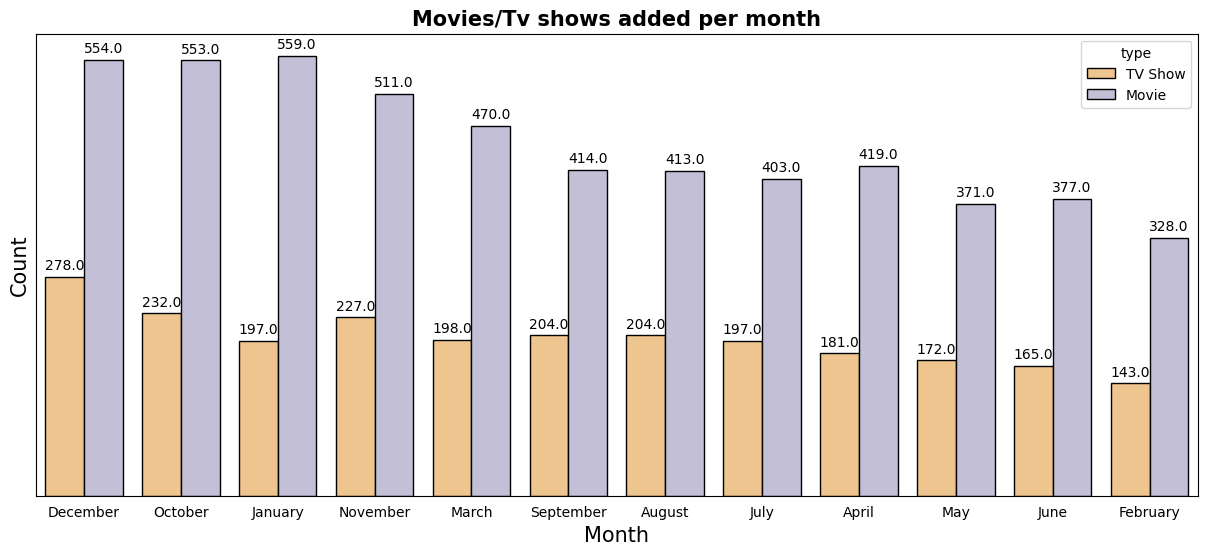

In [148]:
# Release of movies month-wise
plt.figure(figsize = (15,6))
ax1 = sns.countplot(x = 'month_added', order = netflix_df['month_added'].value_counts().index[:13], data = netflix_df, hue = 'type', palette = 'PuOr', ec='black')


plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# for annotation
for j in ax1.patches:
    ax1.annotate(format(j.get_height()),
                     (j.get_x() + j.get_width() / 2,
                      j.get_height()), ha='center', va='center',
                     size=10,color='black', 
                     xytext=(0, 8),
                     textcoords='offset points')

# x, y labels and title
plt.title('Movies/Tv shows added per month',fontsize = 15, fontweight = 'bold')  
plt.xlabel('Month', fontsize = 15) 
plt.ylabel('Count', fontsize = 15)    
plt.show()

The maximum number of movies and TV shows were uploaded during the holiday season, primarily in December, October, and January.

### Movies / TV shows added per day on Netflix

In [149]:
# Creating a dataframe to store day values counts.
days_df = pd.DataFrame(netflix_df.day_added.value_counts().reset_index())
days_df.rename(columns={'index':'Day', 'day_added':'Count'}, inplace=True)

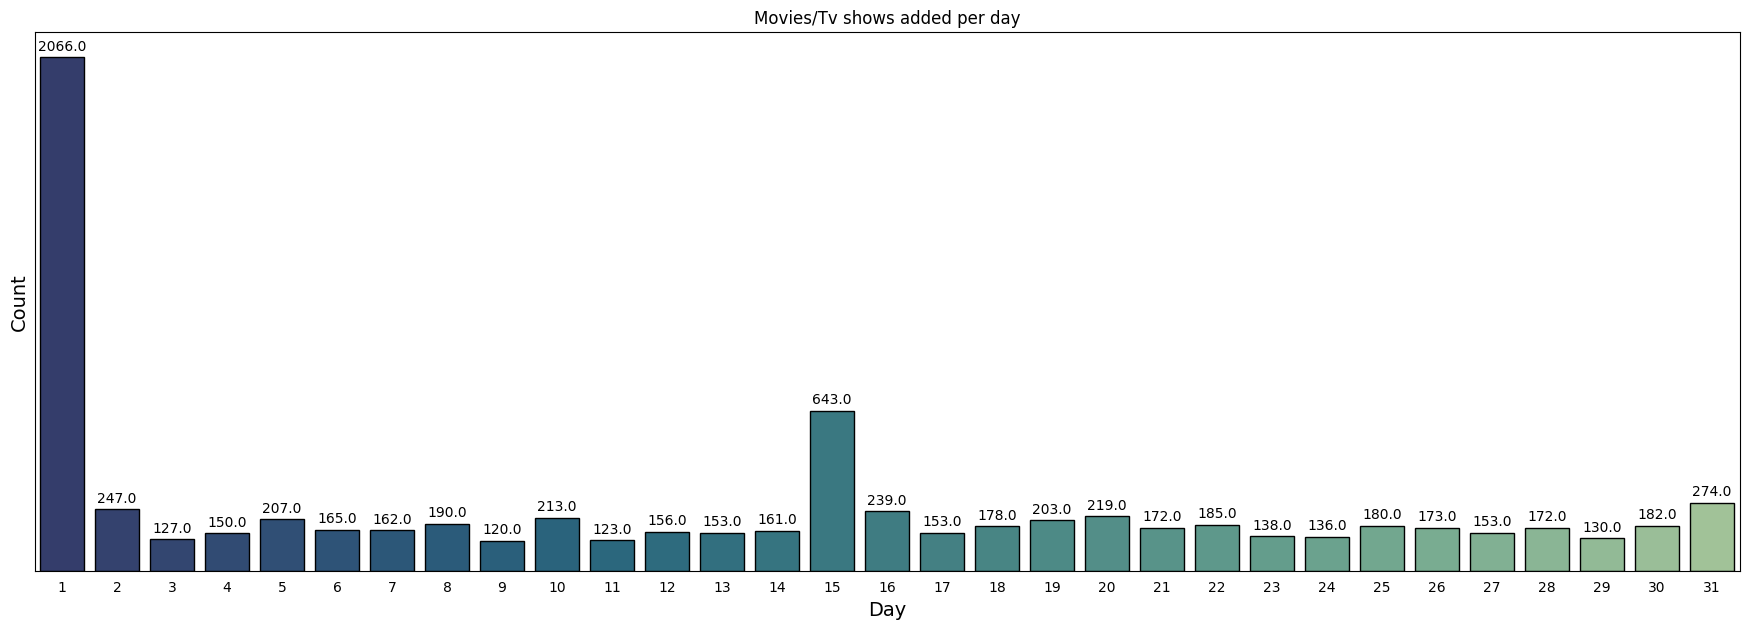

In [150]:
# figure size
plt.figure(figsize=(22,7))

# title
plt.title('Movies/Tv shows added per day')
plt.xlabel('Days', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

# barplot
ax2 = sns.barplot(data = days_df, x='Day', y = 'Count', palette="crest_r", ec='black')

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# anootation
for j in ax2.patches:
    ax2.annotate(format(j.get_height()),
                     (j.get_x() + j.get_width() / 2,
                      j.get_height()), ha='center', va='center',
                     size=10,color='black', 
                     xytext=(0, 8),
                     textcoords='offset points')


Nearly ten times more content is added on the first day of every month compared to other days.

###Top 15 countries with most content


In [151]:
top_countries = netflix_df[netflix_df['country'] != 'Not available']

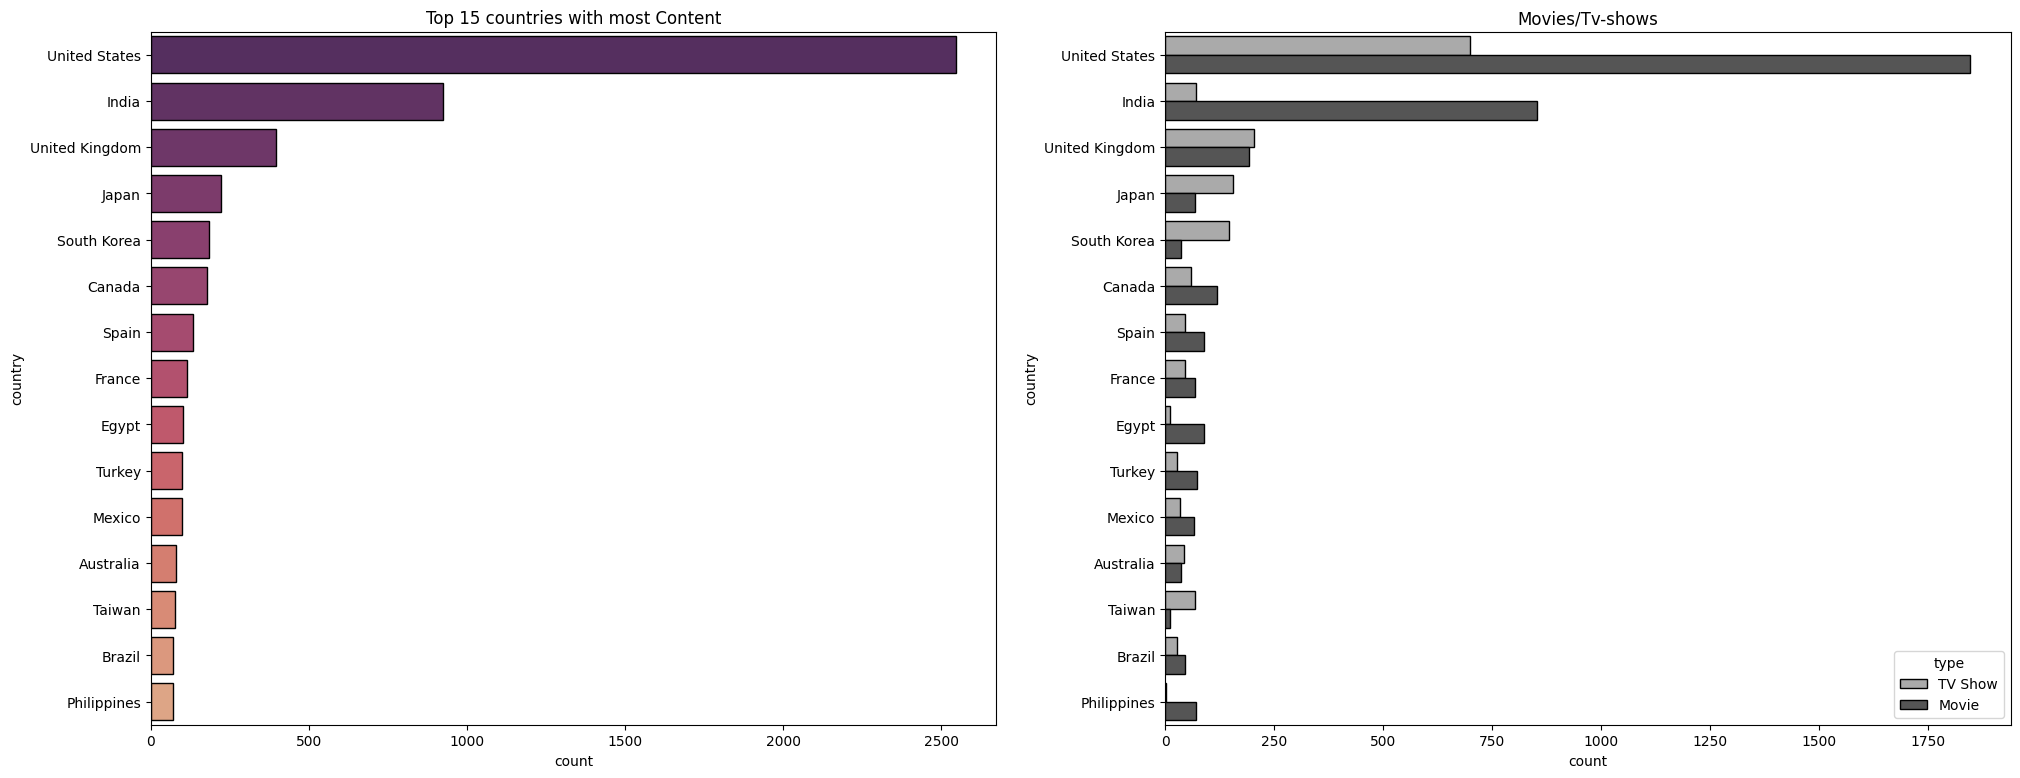

In [152]:
#Figuring some graph
fig, ax = plt.subplots(1,2,figsize=(24,9))

# order
order_2 = top_countries['country'].value_counts().index[:15]

# countplot 1
sns.countplot(data=top_countries,y='country',ax = ax[0],order = order_2, palette = 'flare_r', ec='black').set(title = 'Top 15 countries with most Content')

# countplot 2
sns.countplot(data=top_countries, y ='country',ax = ax[1],order = order_2, hue='type', palette = 'gray_r', ec='black').set(title ='Movies/Tv-shows')
plt.show()


We can see that the United States of America, India and the United Kingdom are the top three countries producing the most content on Netflix.

###Genres

In [153]:
# storing movie genres after spliting on commas and then stacking because there are more than one genres for one title
genre_mov = only_movies['genres'].str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)

In [154]:
# storing tv shows genres after spliting on commas and then stacking because there are more than one genres for one title
genre_show = only_tv_shows['genres'].str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)

Text(0.5, 1.0, 'Top 15 movie genres')

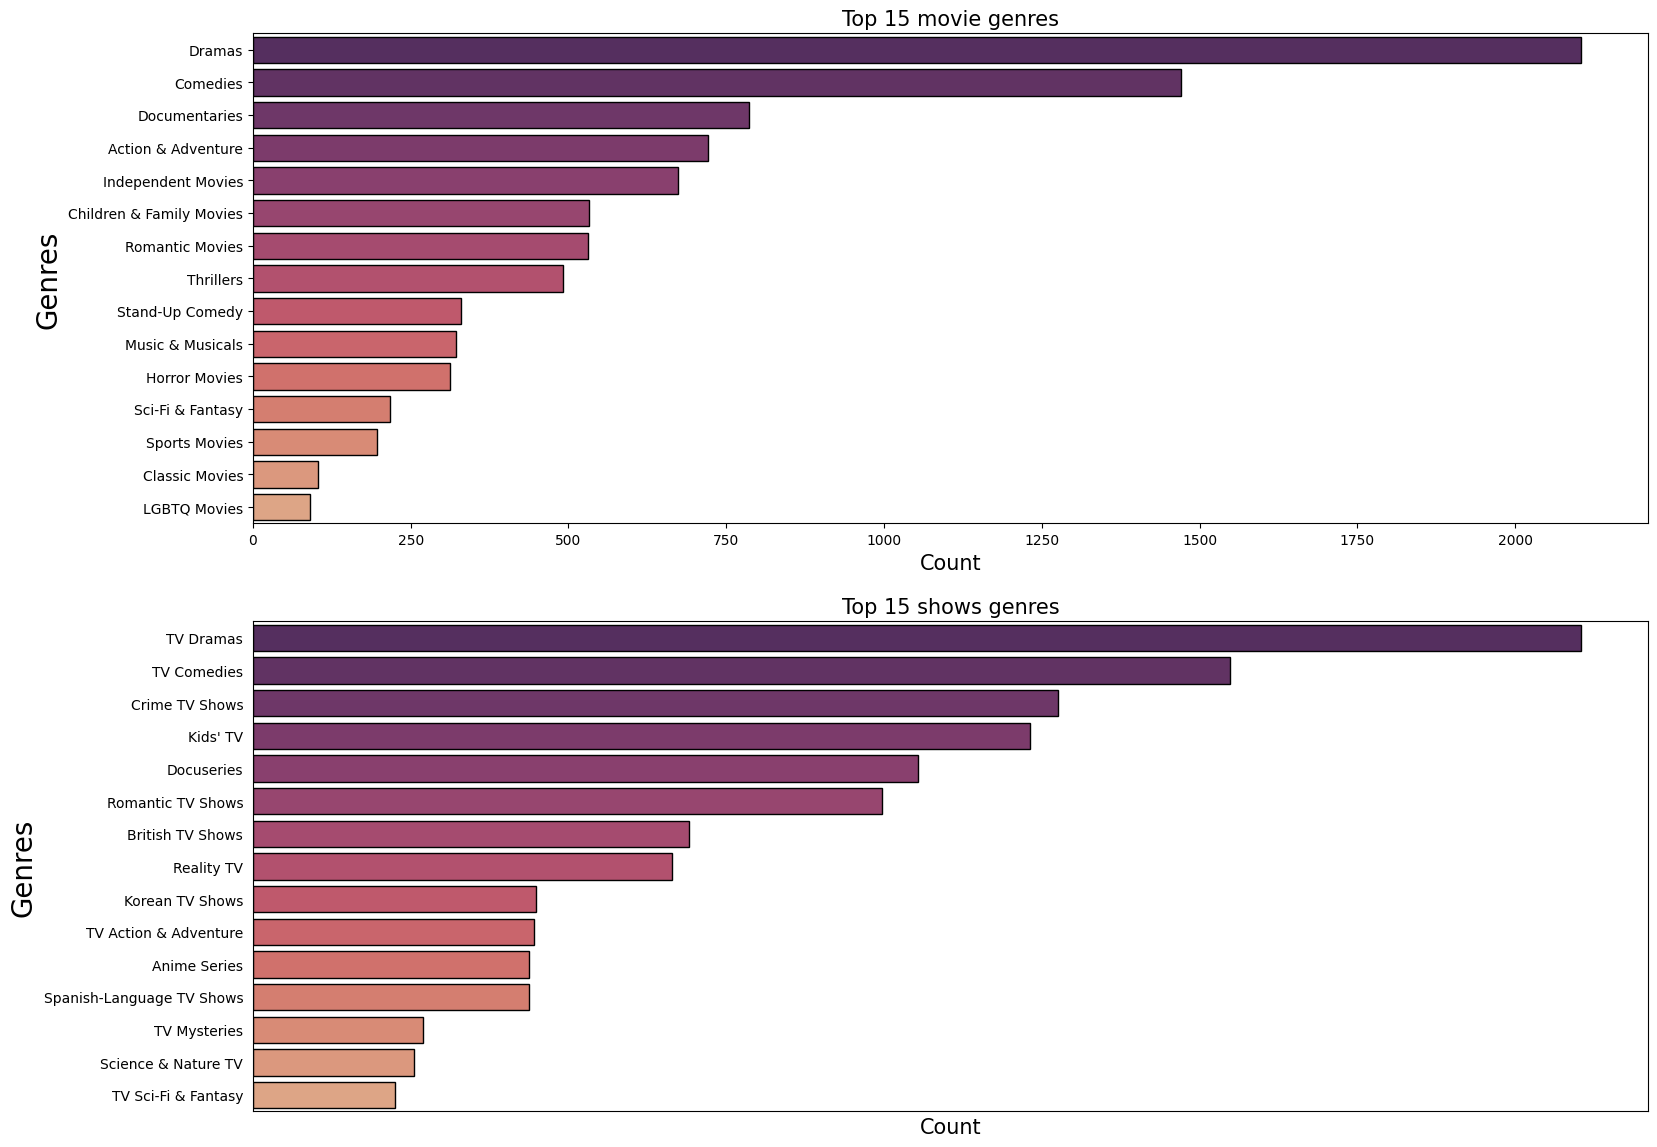

In [227]:
# figure size
fig, ax4 = plt.subplots(2,1, figsize = (18,14))

# order 1
od1 = genre_mov.value_counts().index[1:16]

# order 2
od2 = genre_show.value_counts().index[1:16]

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)

# countplots
sns.countplot(y = genre_show, order = od2, ax = ax4[1], ec='black', palette = 'flare_r')
sns.countplot(y = genre_mov, order = od1, ax = ax4[0], ec='black', palette = 'flare_r')

# labesl
ax4[0].set_xlabel('Count', fontsize = 15)
ax4[1].set_xlabel('Count', fontsize = 15)
ax4[0].set_ylabel('Genres', fontsize = 20)
ax4[1].set_ylabel('Genres', fontsize = 20)

# titles
ax4[1].set_title('Top 15 shows genres', fontsize = 15)
ax4[0].set_title('Top 15 movie genres', fontsize = 15 )

The top three genres in Movies are Dramas, Comedies and Documentaries.

In Tv shows as well, the top two spots are the same as movies which are Tv Dramas and Comedies, and the third one is Crime Tv shows

###Ratings


In [156]:
# printing unique rating present in both movies and tv shows
print('TV Shows Ratings:',netflix_df[netflix_df['type'] == 'TV Show']['rating'].unique(),'\n')
print('Movies Ratings:',netflix_df[netflix_df['type'] == 'Movie']['rating'].unique())

TV Shows Ratings: ['TV-MA' 'TV-14' 'TV-PG' 'TV-Y7' 'TV-G' 'TV-Y' 'NR' 'R' 'TV-Y7-FV'] 

Movies Ratings: ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'PG' 'G' 'TV-Y7'
 'NC-17' 'TV-Y7-FV' 'UR']


**RATING AND THEIR MEANINGS**
TV-MA: Mature Audience Only

R: Restricted

PG-13: Parents Strongly Cautioned

TV-14: Parents Strongly Cautioned

TV-PG: Parental Guidance Suggested

NR :Not Rated

TV-G: General Audience

TV-Y: Programs aimed at a very young audience

TV-Y7: Directed to Older Children

PG: Parental Guidance Suggested

G: General Audiences

NC-17: Clearly Adult

TV-Y7 FV: Directed to Older Children - Fantasy Violence

UR: Unrated

In [157]:
#  Creating new column to assign suitable age group to each official ratings
rating_type = {
    'TV-PG': 'Pre-Teens',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Pre-Teens',
    'TV-Y7': 'Pre-Teens',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Pre-Teens',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
# adding a new column replacing the original rating values with rating group
netflix_df['rating_group'] = netflix_df['rating'].replace(rating_type)

# Unique values in ratings group
netflix_df['rating_group'].unique()

array(['Adults', 'Teens', 'Pre-Teens', 'Kids'], dtype=object)

In [158]:
# Rating group wise content in the data set
netflix_df['rating_group'].value_counts()/netflix_df['rating_group'].value_counts().sum()*100

Adults       46.550837
Teens        29.781210
Pre-Teens    17.078507
Kids          6.589447
Name: rating_group, dtype: float64

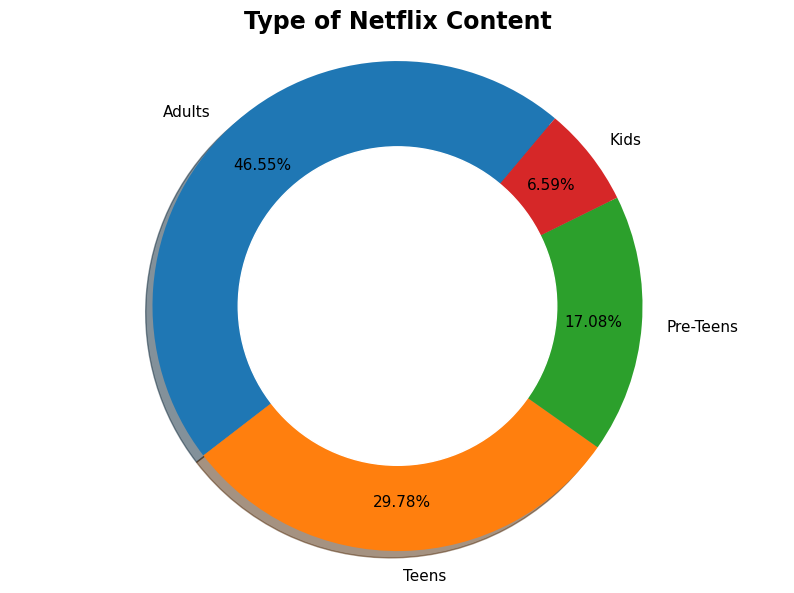

In [159]:
# Create a piechart
plt.figure(figsize=(10, 7))

# colour scheme
clr = sns.color_palette('tab10',4)

# labels
labels=['Adults', 'Teens', 'Pre-Teens', 'Kids']

# pie plot
plt.pie(netflix_df['rating_group'].value_counts(),
        labels = labels,
        autopct='%1.2f%%', 
        colors = clr,
        textprops={'fontsize': 11},
        startangle = 50,
        pctdistance = .8,
        shadow = True)

# to make donut plot
circle = plt.Circle( (0,0), 0.65, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

# Setting title
plt.title('Type of Netflix Content', fontweight = 'bold', fontsize = 17)
plt.axis('equal')
plt.show()

Nearly half content on Netflix is adult rated, followed by teens, Pre-Teens and Kids.

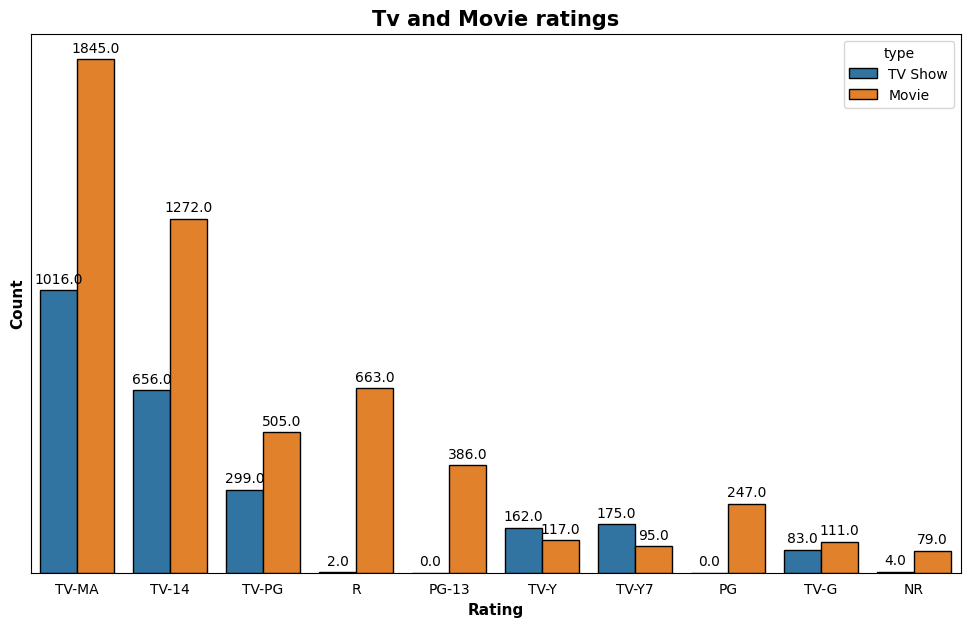

In [160]:
# figure size
plt.figure(figsize = (12,7))

# countplot
ax = sns.countplot(x = 'rating', data = netflix_df, order = netflix_df.rating.value_counts().index[:10], hue = 'type', ec='black' )

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# annotation
for j in ax.patches:
    ax.annotate(format(j.get_height()),
                     (j.get_x() + j.get_width() / 2,
                      j.get_height()), ha='center', va='center',
                     size=10,color='black', 
                     xytext=(0, 8),
                     textcoords='offset points')


# Setting labels, title and fonts
plt.title('Tv and Movie ratings', fontweight = 'bold', fontsize = 15)
plt.xlabel('Rating', fontweight = 'bold', fontsize = 11)
plt.ylabel('Count', fontweight = 'bold', fontsize = 11)
plt.show()

###Top actors in Movies and TV shows

First we will select and store only valid names from 'cast' column of the dataset and we will also set 'title' column as index.

In [161]:
# Storing valid names and setting title
actor_movies = only_movies[only_movies.cast != 'Not available'].set_index('title')

Next we will split the 'cast' on comma (', ') because there are movies where more than one actors are present. Also, expanding the data frame so that every cast has a different column based on title.

In [162]:
actor_movies = actor_movies.cast.str.split(', ', expand= True)

In [163]:
actor_movies.head(2)

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
title,,,,,,,,,,,,,,,,,,,,,
7:19,DemiÃ¡n Bichir,HÃ©ctor Bonilla,Oscar Serrano,Azalia Ortiz,Octavio Michel,Carmen Beato,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
23:59,Tedd Chan,Stella Chung,Henley Hii,Lawrence Koh,Tommy Kuan,Josh Lai,Mark Lee,Susan Leong,Benjamin Lim,None,...,None,None,None,None,None,None,None,None,None,None


In [164]:
actor_movies = actor_movies.stack().reset_index(level = 1, drop = True)

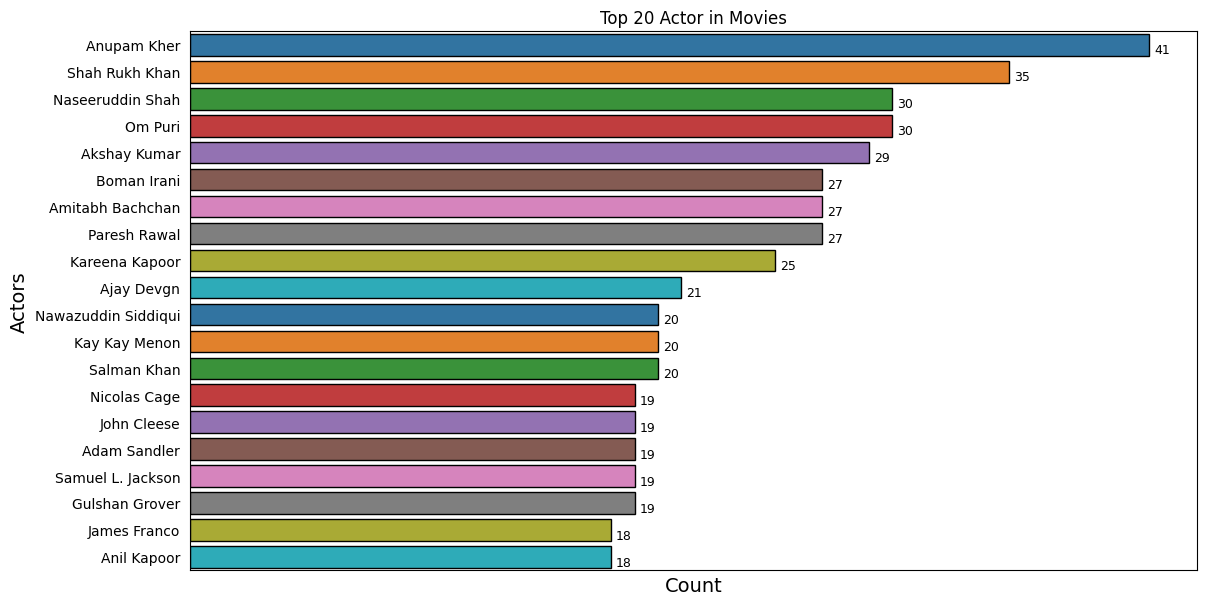

In [165]:
# figure size
plt.figure(figsize=(13,7))

# title
plt.title('Top 20 Actor in Movies')

# countplot
ax = sns.countplot(y = actor_movies, order=actor_movies.value_counts().index[:20], palette='tab10', ec='black')

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)

# annotation
for p in ax.patches:
    ax.annotate(int(p.get_width()), 
                ((p.get_x() + p.get_width()), p.get_y()), 
                xytext=(15, -14),
                fontsize=9,
                color='black',
                textcoords='offset points', 
                horizontalalignment='right')

plt.xlabel('Count', fontsize = 14)
plt.ylabel('Actors', fontsize = 14)
plt.show()


Anupan Kher, Shah Rukh Khan and Naseeruddin Shah are the top three actors.

We will go through with the same process for TV shows

In [166]:
actor_tvshow = only_tv_shows[only_tv_shows.cast != 'Not available'].set_index('title')

In [167]:
actor_tvshow = actor_tvshow.cast.str.split(', ', expand= True)

In [168]:
actor_tvshow = actor_tvshow.stack().reset_index(level = 1, drop = True)

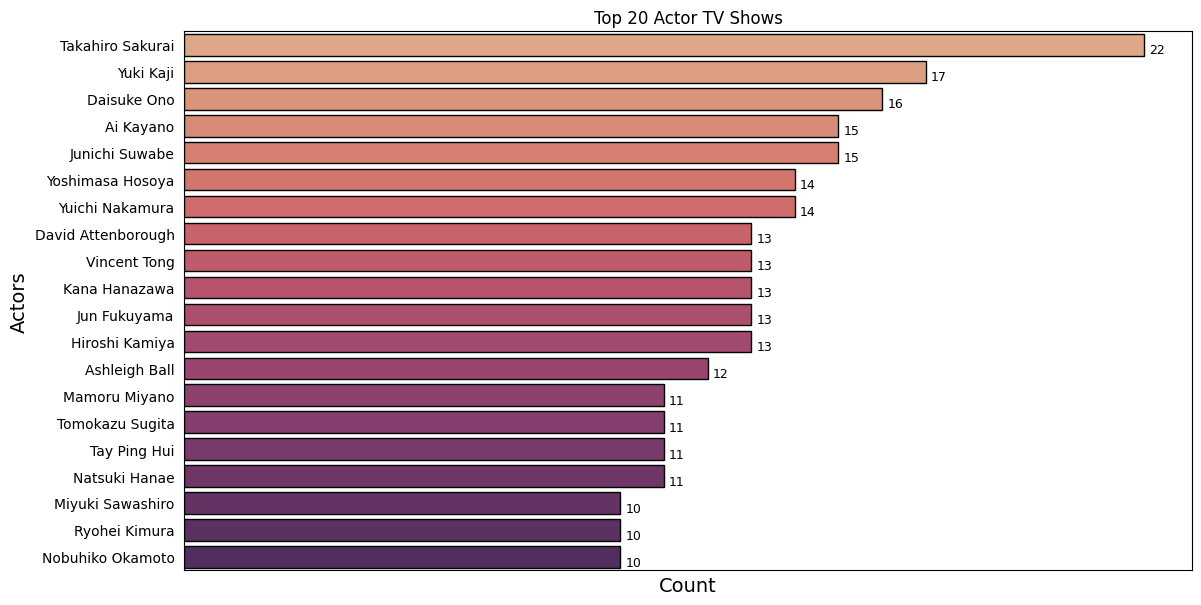

In [169]:
# figuresize
plt.figure(figsize=(13,7))

# title
plt.title('Top 20 Actor TV Shows')

# countplot
ax = sns.countplot(y = actor_tvshow, order=actor_tvshow.value_counts().index[:20], palette='flare', ec='black')

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)

# annotation
for p in ax.patches:
    ax.annotate(int(p.get_width()), 
                ((p.get_x() + p.get_width()), p.get_y()), 
                xytext=(15, -14),
                fontsize=9,
                color='black',
                textcoords='offset points', 
                horizontalalignment='right')

plt.xlabel('Count', fontsize = 14)
plt.ylabel('Actors', fontsize = 14)
plt.show()

###Top 15 Movies Director

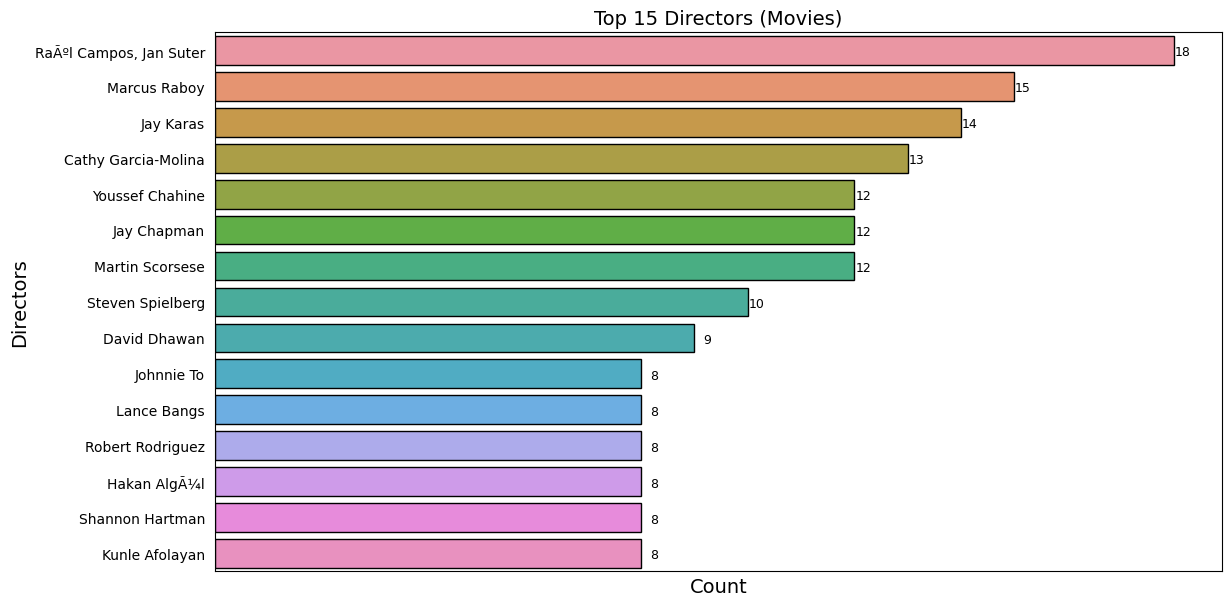

In [170]:
# figure size
plt.figure(figsize = (13,7))

# countplot
ax = sns.countplot(data = only_movies, y = 'director', order = only_movies.director.value_counts().index[1:16], ec='black')

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)

# annotation
for p in ax.patches:
    ax.annotate(int(p.get_width()), 
                ((p.get_x() + p.get_width()), p.get_y()), 
                xytext=(12, -14),
                fontsize=9,
                color='black',
                textcoords='offset points', 
                horizontalalignment='right')

plt.title('Top 15 Directors (Movies)', fontsize = 14)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Directors', fontsize = 14)
plt.show()

###Top 15 TV shows directors

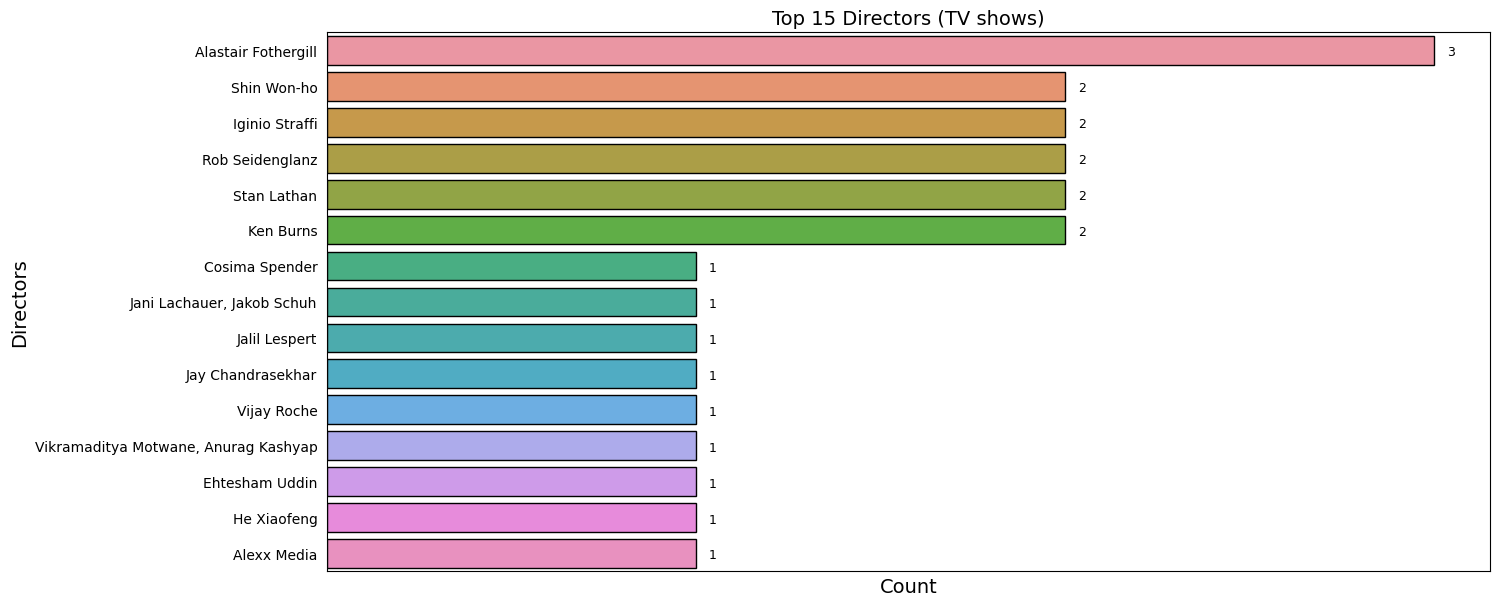

In [171]:
# figure size
plt.figure(figsize = (15,7))

# countplot
ax = sns.countplot(data = only_tv_shows, y = 'director', order = only_tv_shows.director.value_counts().index[1:16], ec='black')

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)

# annotation
for p in ax.patches:
    ax.annotate(int(p.get_width()), 
                ((p.get_x() + p.get_width()), p.get_y()), 
                xytext=(15, -14),
                fontsize=9,
                color='black',
                textcoords='offset points', 
                horizontalalignment='right')

plt.title('Top 15 Directors (TV shows)', fontsize = 14)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Directors', fontsize = 14)
plt.show()

###Duration

In [172]:
# Selecting only duration and type
movie_duration = only_movies[['duration']]

In [173]:
# selecting only the interger part i.e., '93' from '93 mins'
movie_duration['duration'] = movie_duration['duration'].apply(lambda x : int(x.split()[0]))

Text(0, 0.5, 'Count')

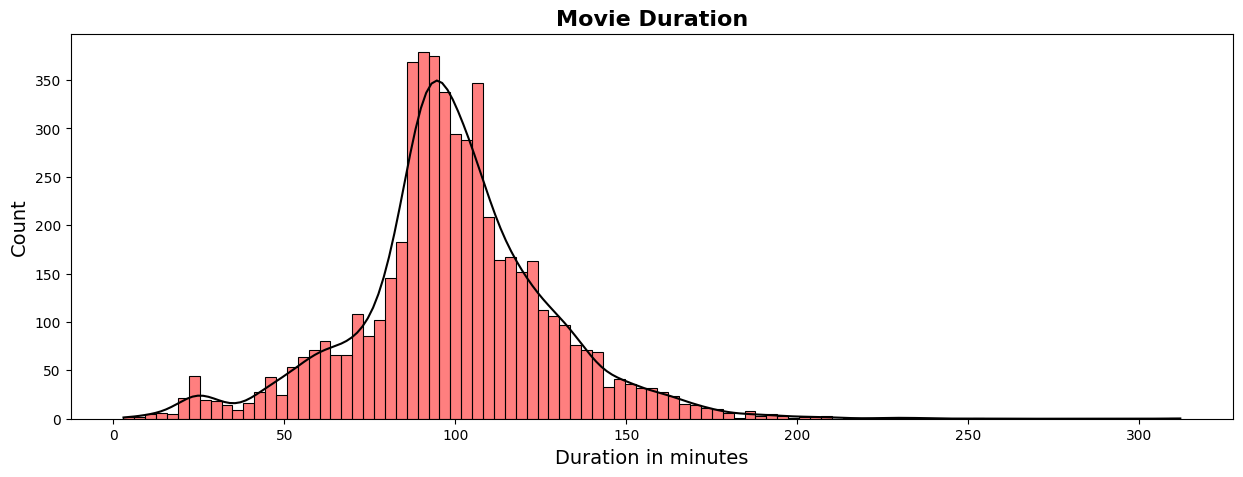

In [174]:
# Distribution
# figuresize
plt.figure(figsize=(15,5))

# histplot
ax = sns.histplot(x = 'duration', data = movie_duration, kde = True, color = 'red')
ax.lines[0].set_color('black')

# title
plt.title("Movie Duration",size='16',fontweight="bold")
plt.xlabel('Duration in minutes', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

Movie duration histogram is following a Normal or Gaussian Distribution and it has mean near 100 minutes.

Text(0, 0.5, 'Count')

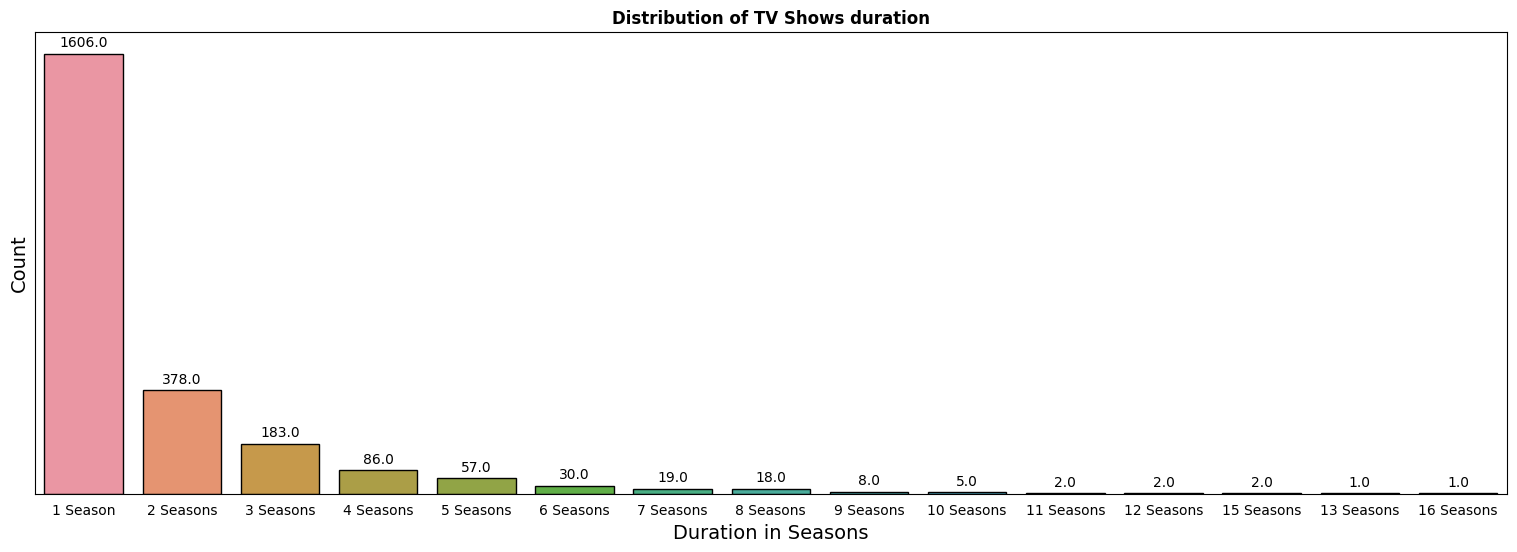

In [175]:
# figure size
plt.figure(figsize=(19,6))

# title
plt.title("Distribution of TV Shows duration",fontweight='bold')

# countplot
ax3 = sns.countplot(x = only_tv_shows['duration'],
                    data = only_tv_shows,
                    order = only_tv_shows['duration'].value_counts().index, 
                    ec='black')

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# annotation
for j in ax3.patches:
    ax3.annotate(format(j.get_height()),
                     (j.get_x() + j.get_width() / 2,
                      j.get_height()), ha='center', va='center',
                     size=10,color='black', 
                     xytext=(0, 8),
                     textcoords='offset points')
    
plt.xlabel('Duration in Seasons', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

The majority of the Tv shows on Netflix are limited to a single season.

We made a DataFrame to show the top countries and now, we will a new column 'count' and set all values to 1.

In [176]:
top_countries['count'] = 1

In [177]:
top_countries.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,day_added,month_added,year_added,count
0,s1,TV Show,3%,Not available,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,August,2020,1


In [178]:
data = top_countries.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:11]

Now we will use the groupby function on the columns 'country' and 'count' and sort them in ascending order. We will only select the 'country' column.

In [179]:
data = top_countries.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:11]
data = data['country']

In [180]:
data

0      United States
1              India
2     United Kingdom
3              Japan
4        South Korea
5             Canada
6              Spain
7             France
8              Egypt
9             Mexico
10            Turkey
Name: country, dtype: object

In [181]:
# heatmap
df_heatmap = netflix_df[netflix_df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['rating_group'],normalize = "index").T
df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,Turkey,United Kingdom,United States
rating_group,,,,,,,,,,,
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.469945,0.835821,0.53,0.512626,0.502357
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.027322,0.022388,0.01,0.093434,0.073449
Pre-Teens,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.120219,0.044776,0.10,0.204545,0.187353
Teens,0.146893,0.683168,0.165217,0.567714,0.352679,0.14,0.382514,0.097015,0.36,0.189394,0.236842


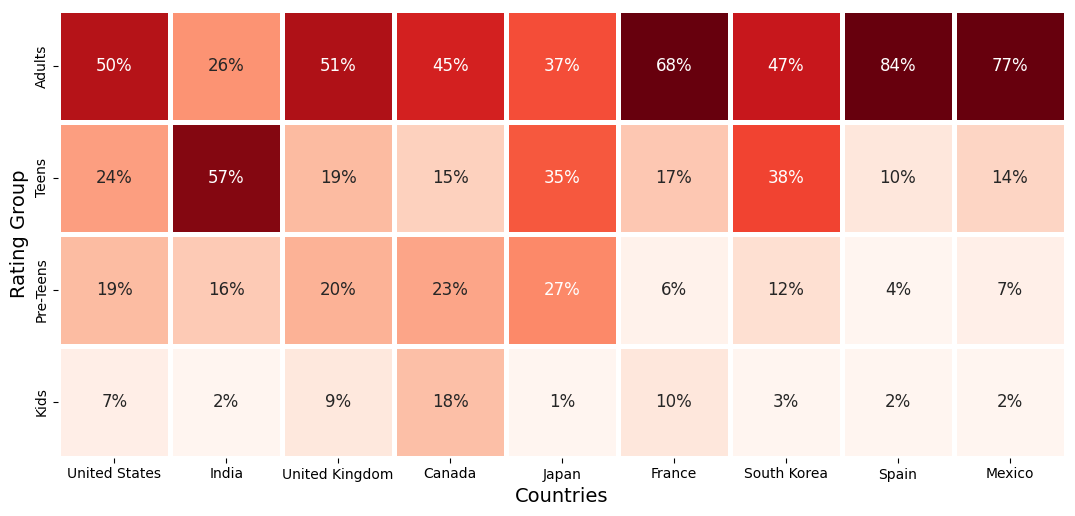

In [182]:
# figsize
fig, ax = plt.subplots(1, 1, figsize=(13, 9))

# order
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

# age rating order
age_order = ['Adults', 'Teens', 'Pre-Teens', 'Kids']

# heatmap
sns.heatmap(df_heatmap.loc[age_order,country_order2],
            cmap="Reds",
            square=True, 
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize":12})

# x and y labels
plt.xlabel('Countries', fontsize = 14)
plt.ylabel('Rating Group', fontsize = 14)
plt.show()

## Text Preprocessing




In [183]:
# importing libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch

In [184]:
# making a copy
df = netflix_df.copy()

In [185]:
# Taking the primary country into account for each record and not the others
df.country = df.country.str.split(',')     
df.loc[:, 'country'] = df.country.map(lambda x: x[0])

In [186]:
# Taking the primary director into account for each record and not the others
df.director = df.director.str.split(',')
df.loc[:, 'director'] = df.director.map(lambda x: x[0])

In [187]:
# Taking the primary cast into account for each record and not the others
df.cast = df.cast.str.split(',')
df.loc[:, 'cast'] = df.cast.map(lambda x: x[0])

In [188]:
# combining all features for modelling
df['combined_features'] = df['genres'].astype(str) + " " + df['description'].astype(str) + " " + df['type'].astype(str) + " " + df['country'].astype(str) + " " +df['cast'].astype(str) + " " + df['rating'].astype(str)

In [189]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [190]:
import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [191]:
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [192]:
# Create an object of stemming function
stemmer = SnowballStemmer('english')
stop_words = stopwords.words('english')

In [193]:
# defining a fuction
def remove_stopwords(text):
  '''
  This function removes stop words and converts text to lowercase
  '''

  ## removing stopwords after converting the text to lowercase
  text = [word.lower() for word in text.split() if word.lower() not in stop_words]

  # joining the list of words with space separator 
  return " ".join(text)

In [194]:
# Defining aa function
def remove_punctuations(text):
  ''' 
  this function removes punctuations from the text
  '''

  # replacing the punctuations with no space
  translator = str.maketrans('','', string.punctuation)

  # return the text stripped of punctuation marks
  return text.translate(translator)

In [195]:
# Defining a function
def apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)
     


In [196]:
# Removing punctuation from description
df['description'] = df['description'].apply(remove_punctuations)

# Applying Stemming on description column
df['description'] = df['description'].apply(apply_stemming)

In [197]:
df['genres'] = df['genres'].apply(remove_punctuations)

df['genres'] = df['genres'].apply( remove_stopwords )

#Stemming for description
df['genres'] = df['genres'].apply(apply_stemming)

In [198]:
# New columns for storing length of description and genres
df['Length(description)'] = df['description'].apply(lambda x: len(x))

df['Length(genres)'] = df['genres'].apply(lambda x: len(x))

In [199]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,day_added,month_added,year_added,rating_group,combined_features,Length(description),Length(genres)
0,s1,TV Show,3%,Not available,JoÃ£o Miguel,Brazil,2020-08-14,2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,in a futur where the elit inhabit an island pa...,14,August,2020,Adults,"International TV Shows, TV Dramas, TV Sci-Fi &...",125,40
1,s2,Movie,7:19,Jorge Michel Grau,DemiÃ¡n Bichir,Mexico,2016-12-23,2016,TV-MA,93 min,drama intern movi,after a devast earthquak hit mexico citi trap ...,23,December,2016,Adults,"Dramas, International Movies After a devastati...",123,17
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,2018-12-20,2011,R,78 min,horror movi intern movi,when an armi recruit is found dead his fellow ...,20,December,2018,Adults,"Horror Movies, International Movies When an ar...",132,23


In [200]:
# Cleaning the text
remove_brackets = re.compile('[/(){}\|@,;]')
remove_some_punc = re.compile('[^0-9a-z #+_]')
remove_num = re.compile('[\d+]')
stop_word = set(stopwords.words('english'))

# function
def clean_text(inp_str):

    # Lowercase text
    inp_str = inp_str.lower() 

    # Replace remove_brackets symbols by space in text
    inp_str = remove_brackets.sub(' ', inp_str) 
    
    # Remove the XXXX values
    inp_str = inp_str.replace('x', '') 
    
    # Remove remove_num
    inp_str = remove_num.sub('', inp_str)

    # Remove symbols which are in remove_some_punc from text
    inp_str = remove_some_punc.sub('', inp_str) 

    # Remove stopwords from text
    inp_str = ' '.join(word for word in inp_str.split() if word not in stop_word) 
    
    # Remove any words composed of less than 2 or more than 21 letters
    inp_str = ' '.join(word for word in inp_str.split() if (len(word) >= 2 and len(word) <= 21))

    # Stemming the words
    inp_str = ' '.join([stemmer.stem(word) for word in inp_str.split()])
    
    return inp_str

In [201]:
# Applying the clean text funtion to the all text feature column for cleanup
df["combined_features"] = df["combined_features"].apply(clean_text)
df["combined_features"]

0       intern tv show tv drama tv scifi fantasi futur...
1       drama intern movi devast earthquak hit meico c...
2       horror movi intern movi armi recruit found dea...
3       action adventur independ movi scifi fantasi po...
4       drama brilliant group student becom cardcount ...
                              ...                        
7782    drama intern movi lebanon civil war depriv zoz...
7783    drama intern movi music music scrappi poor boy...
7784    documentari intern movi music music documentar...
7785    intern tv show realiti tv dessert wizard adria...
7786    documentari music music documentari delv mysti...
Name: combined_features, Length: 7770, dtype: object

###TFID

In [202]:
# Run TF IDF Vectorizer on the text data
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer
vectorizer = TfidfVectorizer(sublinear_tf= True, # set to True to use a logarithmic form for frequency
                             min_df=10, # minimum numbers of documents a word must be present in to be kept
                             norm='l2', # set to l2, to ensure all our feature vectors have a euclidian norm of 1
                             ngram_range=(1, 2), # we want to consider both unigrams and bigrams
                             stop_words='english')

# transform
X_vc = vectorizer.fit_transform(df["combined_features"])

# look
pd.DataFrame(X_vc.toarray(), columns=vectorizer.get_feature_names_out()).head()

,aamir,aamir khan,aaron,abandon,abduct,abil,aboard,abraham,absurd,abus,...,young son,young woman,young women,younger,youth,zach,zani,zealand,zoe,zombi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
type(X_vc)

scipy.sparse._csr.csr_matrix

In [204]:
# Converting X into array form for further procedure.
X_vc = X_vc.toarray()
     
# Final Shape of vectorized data.
print("The Shape of the Vectorized data", X_vc.shape)

The Shape of the Vectorized data (7770, 2802)


In [205]:
# using standard scaler on length of genres and description
stdscaler = preprocessing.StandardScaler()

features = df[['Length(description)','Length(genres)']]

In [206]:
# description
features.describe()

,Length(description),Length(genres)
count,7770.000000,7770.000000
mean,127.658172,24.342085
std,10.773640,10.677661
min,51.000000,4.000000
25%,123.000000,17.000000
50%,129.000000,24.000000
75%,134.000000,32.000000
max,231.000000,62.000000


##Models

###K-means (Elbow and Silhouette methods)

In [207]:
features_rescale = stdscaler.fit_transform(features)

X = features_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

In [208]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}\n".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.35200659572487314

For n_clusters = 3, silhouette score is 0.3788713935358681

For n_clusters = 4, silhouette score is 0.389566314277489

For n_clusters = 5, silhouette score is 0.339002968084241

For n_clusters = 6, silhouette score is 0.33329981219397

For n_clusters = 7, silhouette score is 0.33856923681720624

For n_clusters = 8, silhouette score is 0.32616090714267754

For n_clusters = 9, silhouette score is 0.3284120383296804

For n_clusters = 10, silhouette score is 0.3229807832142385

For n_clusters = 11, silhouette score is 0.32673878854085836

For n_clusters = 12, silhouette score is 0.3282037985530824

For n_clusters = 13, silhouette score is 0.3275611022516283

For n_clusters = 14, silhouette score is 0.3301771984185598

For n_clusters = 15, silhouette score is 0.33241264517969626



In [209]:
#Clustering the dataset with the optimal number of clusters
model = KMeans(n_clusters = 15, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
model.fit(X)

KMeans(max_iter=600, n_clusters=15, n_init=10, random_state=0, tol=1e-06)

In [210]:
#Predict the clusters and evaluate the silhouette score
clusters = model.predict(X)
score = silhouette_score(X, clusters)
print("Silhouette score is {}".format(score))

Silhouette score is 0.3343504633709944


In [211]:
#Adding a seperate column for the cluster
df["Cluster Label"] = clusters
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,day_added,month_added,year_added,rating_group,combined_features,Length(description),Length(genres),Cluster Label
0,s1,TV Show,3%,Not available,JoÃ£o Miguel,Brazil,2020-08-14,2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,in a futur where the elit inhabit an island pa...,14,August,2020,Adults,intern tv show tv drama tv scifi fantasi futur...,125,40,9
1,s2,Movie,7:19,Jorge Michel Grau,DemiÃ¡n Bichir,Mexico,2016-12-23,2016,TV-MA,93 min,drama intern movi,after a devast earthquak hit mexico citi trap ...,23,December,2016,Adults,drama intern movi devast earthquak hit meico c...,123,17,4
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,2018-12-20,2011,R,78 min,horror movi intern movi,when an armi recruit is found dead his fellow ...,20,December,2018,Adults,horror movi intern movi armi recruit found dea...,132,23,6


In [212]:
sum_of_sq = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq[k] = km.inertia_

In [213]:
sum_of_sq

{1: 15540.000000000018,
 2: 10323.211617142024,
 3: 7423.930465966982,
 4: 5821.62887458273,
 5: 4630.481103697299,
 6: 3899.4432715299363,
 7: 3317.173745187927,
 8: 2930.7195270668462,
 9: 2607.41538880539,
 10: 2365.11679293622,
 11: 2172.251404162088,
 12: 2002.6421671114945,
 13: 1866.2228048313646,
 14: 1730.034791718051}

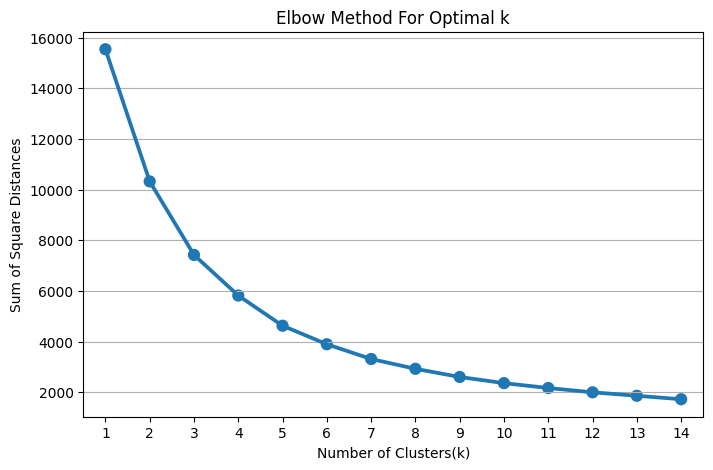

In [214]:
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize = (8,5))
plt.grid(True)
sns.pointplot(x = list(sum_of_sq.keys()), y = list(sum_of_sq.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

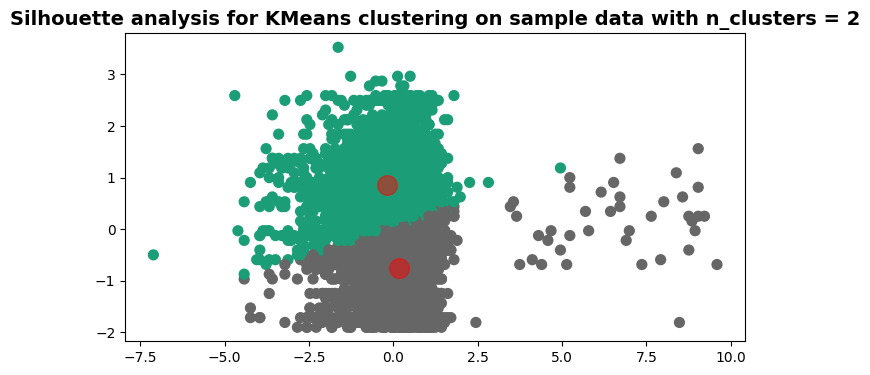

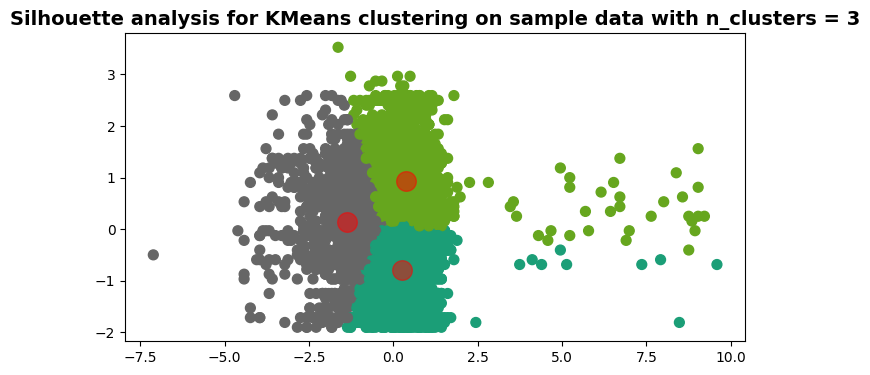

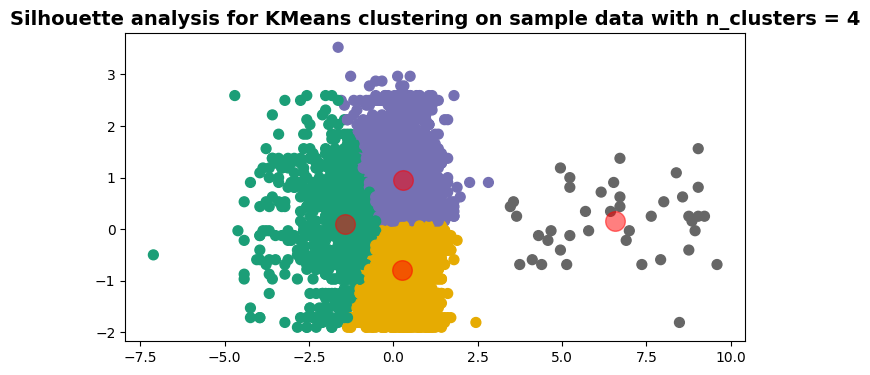

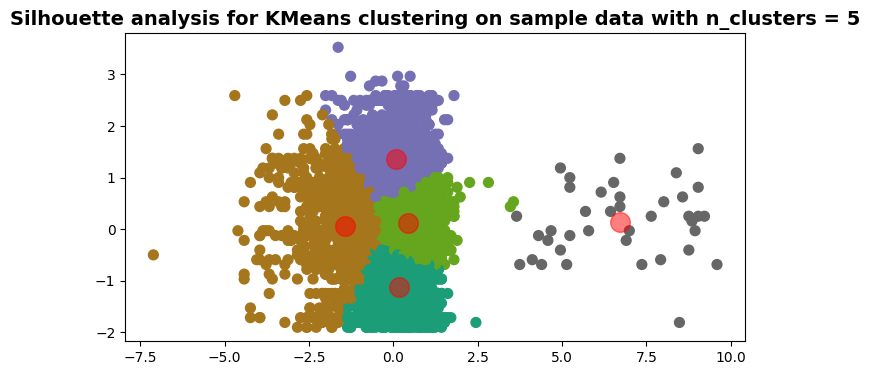

In [215]:
# scatter plot of clusters
v=2

# for loop
for i in (2,3,4,5):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  y_kmeans= kmeans.predict(X)
  plt.figure(figsize=(8,4))
  n =v+1
  
  # plot
  plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='Dark2')

  # centers
  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

  # title
  plt.title(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % i), fontsize=14, fontweight='bold')



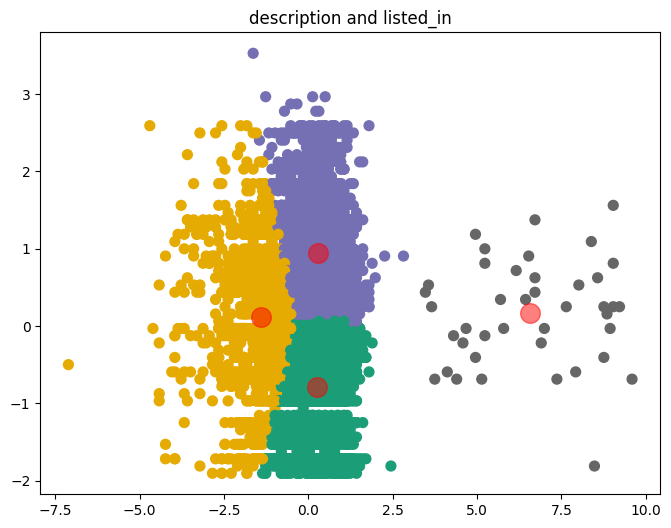

In [216]:
# optimal clusters
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

# figure size, title
plt.figure(figsize = (8, 6))
plt.title('description and listed_in')

# plot
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='Dark2')

# centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
    

###Agglomerative Clustering

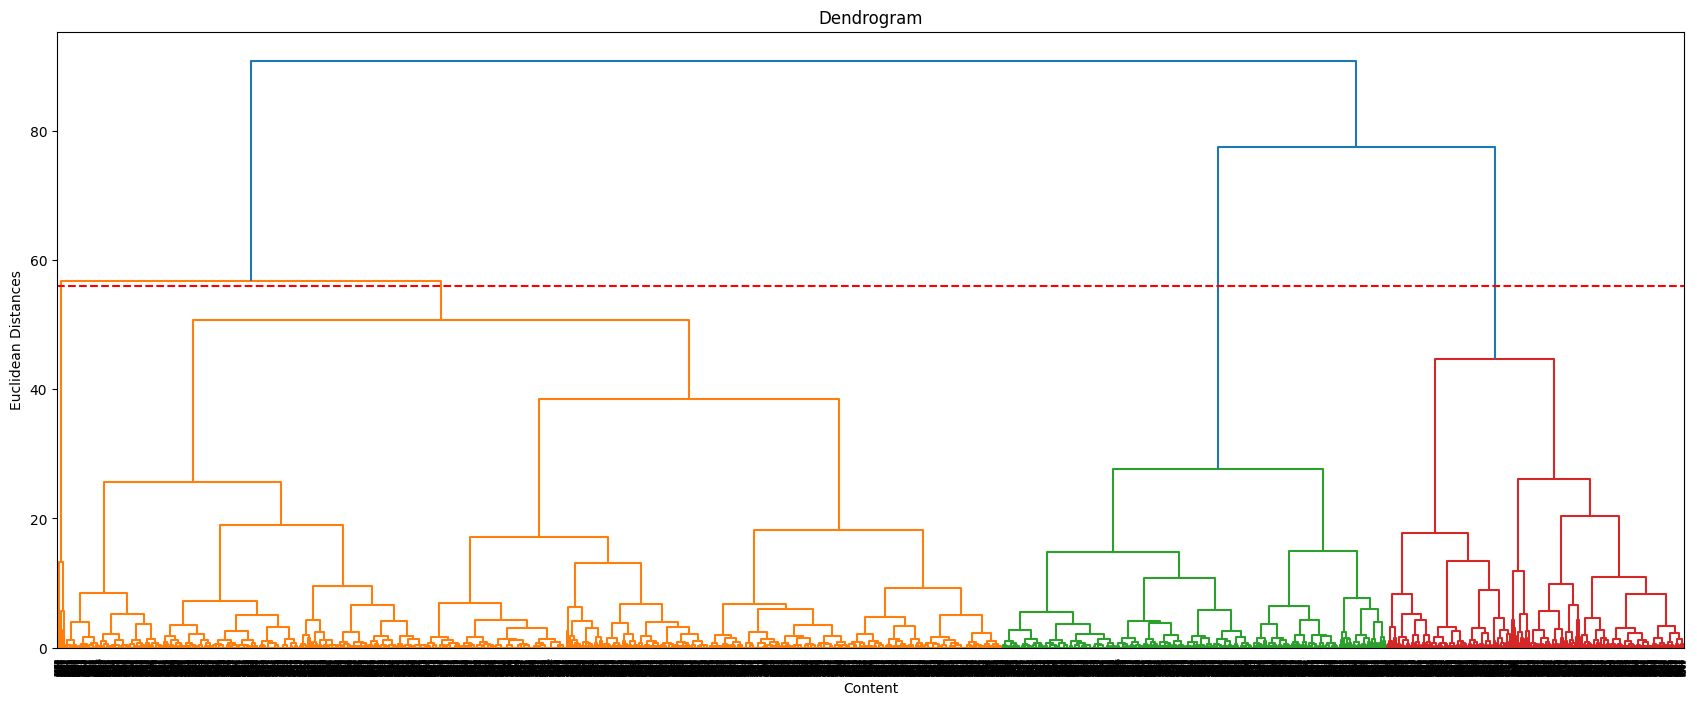

In [217]:
import scipy.cluster.hierarchy as sch

# figure size
plt.figure(figsize=(21,8))

# dendogram
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# horizontal line
plt.axhline(y=56,color='r', linestyle='--')

# title, x and y labels
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show()

###Using PCA

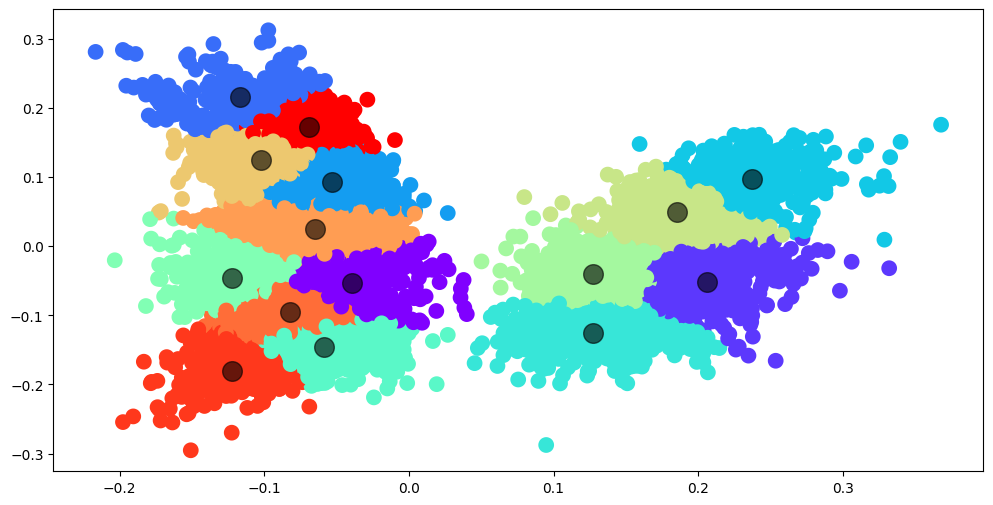

In [218]:
#Applying PCA for dimenstionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
y = pca.fit_transform(X_vc)
kmeans = KMeans(n_clusters=15, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(y)
y_pred = kmeans.predict(y)

plt.figure(figsize=(12, 6))
plt.scatter(y[:, 0], y[:, 1], c=y_pred, s=40, cmap='rainbow', linewidths=5)

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=200, alpha=0.6);

In [219]:
#Predict the clusters and evaluate the silhouette score
score = silhouette_score(y, y_pred)
print("Silhouette score is {}".format(score))
    

Silhouette score is 0.3597898913574257


##Recommendation


In [220]:
from sklearn.metrics.pairwise import linear_kernel

#compute the cosine similarity matrix 
cosine_sim= linear_kernel(X_vc,X_vc)

In [221]:
#Series for getting the index and title
indices = pd.Series(df.index,index=df['title']).drop_duplicates()
     

In [222]:
def get_recommendations(title, cosine_sim = cosine_sim):

    #get index of the matching title
    idx=indices[title]

    #get the similarity score of the similar titles
    sim_scores=list(enumerate(cosine_sim[idx]))

    #sort the movies based on the similarity score
    sim_scores=sorted(sim_scores, key=lambda x:x[1], reverse=True)

    #get the similarity score of top 10 movies
    sim_scores=sim_scores[1:11]

    #get the indices 
    movie_indices = [i[0] for i in sim_scores]
    
    #return the top indices
    return df['title'].iloc[movie_indices]

In [223]:
get_recommendations('Breaking Bad')

5980              Tango
7390        Van Helsing
6046        The 10 Sins
4236             MOTHER
7455               Wadi
2505            Gothika
4348           My Pride
16               Feb-09
4030        Memory Love
5480    See You in Time
Name: title, dtype: object

In [224]:
get_recommendations('Peaky Blinders')

5102                        Ratched
6440     The Haunting of Hill House
7046               ThirTEEN Terrors
3730                      Lost Girl
6678                       The Mist
5441                         Scream
6727                  The Originals
534     Anjaan: Special Crimes Unit
6439      The Haunting of Bly Manor
2461                         Goedam
Name: title, dtype: object

##Conclusions



*   Nearly 70% of the content available on Netflix is movies.

*   After 2014 content on Netflix grew exponentially till 2020, and then it dropped drastically due to COVID.

*   USA, India, and UK are the top three countries producing maximum content.

*   Dramas and comedies are the top two genres in both TV shows and movies. The next most popular genre in movies is documentaries, while in TV shows its crime.

*   TV-MA-rated content is the maximum number in the dataset. This rating indicates that the content is for an audience above the age of 17.

*   Text cleaning and vectorization were done on the combined features which include origin country, leading cast member, rating type, content type and description for clustering analysis.

*   We found K=4 as an optimal value for clusters in K-Means by elbow and sillhouette and From Agglomerative clustering we got 4 clusters using which we grouped our data into 4 distinct clusters.

*   Using the given data a simple recommender system was created using cosine similarity and recommendations for Movies and Tv Shows were obtained


